## **200968108 Sec-A 27**
## **Week-1** Representational Learning using Autoencoders.

Importing required libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.datasets import fashion_mnist

## **1. Use the Fashion MNIST data set and train a basic autoencoder to reconstruct images.**
Train the model using x_train as both the input and the target. 

In [14]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizing the train and test data
x_train = x_train/255.0
x_test = x_test/255.0

In [15]:
# checking the shape of the train and test data
print("X_train shape --> ",x_train.shape)
print("Y_train shape --> ",y_train.shape)
print("X_test shape --> ",x_test.shape)
print("Y_test shape --> ",y_test.shape)

X_train shape -->  (60000, 28, 28)
Y_train shape -->  (60000,)
X_test shape -->  (10000, 28, 28)
Y_test shape -->  (10000,)


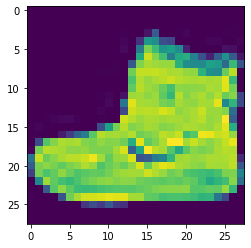

In [16]:
# To check our data, we’ll plot the first image in the training dataset.
plt.imshow(x_train[0])
plt.show()

In [17]:
# reshaping both the train and test images to load into the model
x_train = x_train.reshape(x_train.shape[0],784)
x_test = x_test.reshape(x_test.shape[0],784)

In [18]:
# verifying the shape before loading the images
print("X_train shape --> ",x_train.shape)
print("x_test shape --> ",x_test.shape)

X_train shape -->  (60000, 784)
x_test shape -->  (10000, 784)


#### **Latent size** is the size of the latent space: the vector holding the information after compression. This value is a crucial hyperparameter. If this value is too small, there won’t be enough data for reconstruction and if the value is too large, overfitting can occur.

## **Creating the autoencoder model**
The encoder should learn to compress the dataset from 784 dimensions to the latent space, and the decoder should learn to reconstruct the original images.
Let the autoencoder have two Dense layers: 

a. an encoder, which compresses the images into a 64 dimensional latent 
vector, use reLU as activation function.

b. and a decoder, that reconstructs the original image from the latent space, 
use sigmoid as activation function.


In [19]:
# importng required libraries

from keras.models import Model
from keras.layers import Input, Dense

LATENT_SIZE = 32 # as mentioned in the problem statement
input = Input(shape = (784,))

encoded = Dense(LATENT_SIZE, activation="relu")(input)

decoded = Dense(784, activation="sigmoid")(encoded)

autoencoder_model = Model(input, decoded)

# loss function to be used is mean squared error
autoencoder_model.compile(optimizer="adam", loss="mse")
autoencoder_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [20]:
# training the autoencoder
hist = autoencoder_model.fit(x_train, 
                       x_train,
                       epochs=10, 
                       batch_size=512, 
                       shuffle=True,
                       validation_data=(x_train, x_train))

Epoch 1/10
118/118 [==============================] - 4s 30ms/step - loss: 0.0814 - val_loss: 0.0489
Epoch 2/10
118/118 [==============================] - 4s 34ms/step - loss: 0.0398 - val_loss: 0.0335
Epoch 3/10
118/118 [==============================] - 4s 35ms/step - loss: 0.0304 - val_loss: 0.0277
Epoch 4/10
118/118 [==============================] - 5s 38ms/step - loss: 0.0260 - val_loss: 0.0245
Epoch 5/10
118/118 [==============================] - 4s 37ms/step - loss: 0.0232 - val_loss: 0.0220
Epoch 6/10
118/118 [==============================] - 6s 48ms/step - loss: 0.0211 - val_loss: 0.0201
Epoch 7/10
118/118 [==============================] - 4s 37ms/step - loss: 0.0193 - val_loss: 0.0186
Epoch 8/10
118/118 [==============================] - 4s 33ms/step - loss: 0.0179 - val_loss: 0.0173
Epoch 9/10
118/118 [==============================] - 5s 44ms/step - loss: 0.0167 - val_loss: 0.0161
Epoch 10/10
118/118 [==============================] - 4s 31ms/step - loss: 0.0158 - val_lo

#### Once the model is trained for at least 10 epochs , with loss function as mean square error, test it by encoding and decoding images from the test set. 

In [21]:
# predicting/reconstructing the images using the trained autoencoder
decoded_imgs = autoencoder_model.predict(x_test) 

313/313 [==============================] - 1s 1ms/step


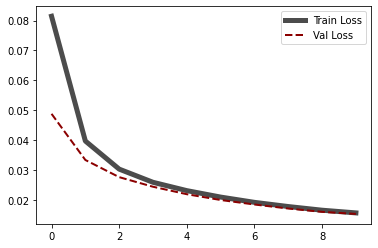

In [22]:
# plotting the loss curve
plt.plot(hist.history["loss"], label = "Train Loss", color = "black", alpha=0.7, linewidth=5)
plt.plot(hist.history["val_loss"], label = "Val Loss", color = "darkred", linewidth=2, linestyle='dashed')

plt.legend()
plt.show()

We can observe the gradual decrease in the train and validation loss

## Display original and reconstructed images.

### *Visualizing the **original** images*

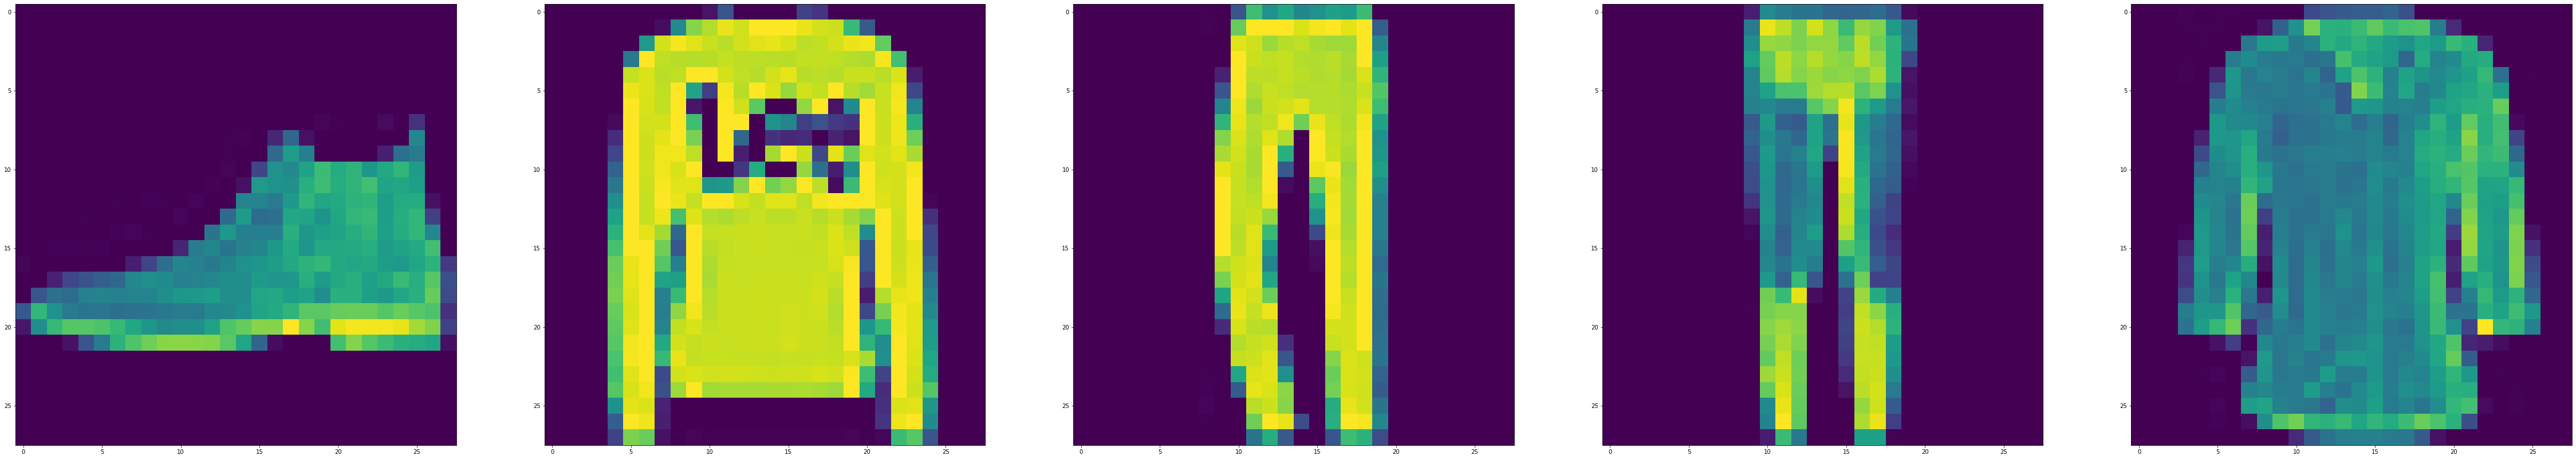

In [23]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(x_test[i].reshape(28, 28))
plt.show()

### *Visualizing the **reconstructed** images*

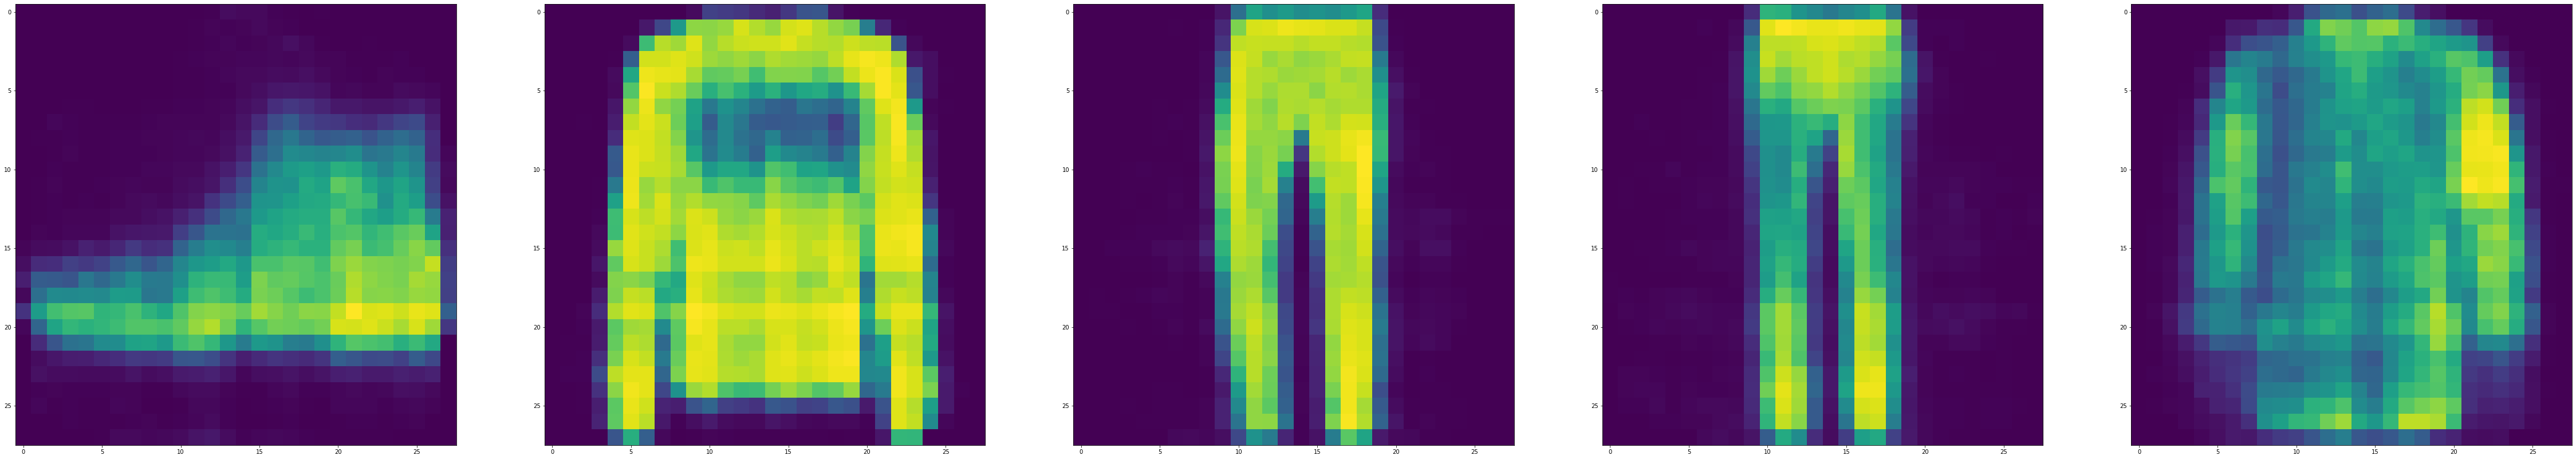

In [24]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(decoded_imgs[i].reshape(28, 28))
plt.show()

### **Observation:**
* #### We can see the reconstructed images being very similar to the original images with little blurness
* #### Performance of our autoencoder model can be improved by increasing the number of epochs and batch size.